### k-최근접 이웃회귀의 한계
- 데이터 범위 밖의 새로운 데이터는 예측이 불가능하다는 것이다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length,
                                                                      perch_weight, random_state = 42)

In [6]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [8]:
# k-최근접 이웃 회귀 알고리즘(이웃수 = 3)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [11]:
# 길이가 50cm인 생선의 무게 예측
knr.predict([[100]])

array([1033.33333333])

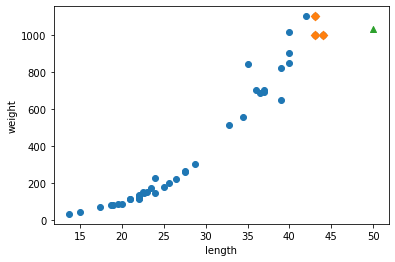

In [10]:
# 길이가 50cm인 생선의 주변 이웃들을 살펴보자
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

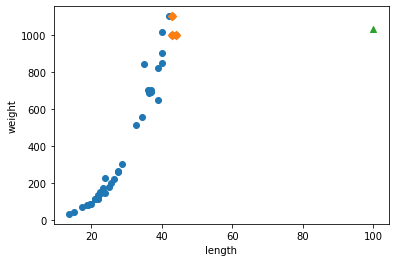

In [12]:
# 길이가 50cm인 생선의 주변 이웃들을 살펴보자
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## LinearRegression 알고리즘

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 모델 학습
lr.fit(train_input, train_target)

LinearRegression()

In [14]:
lr.predict([[50]])

array([1241.83860323])

In [15]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


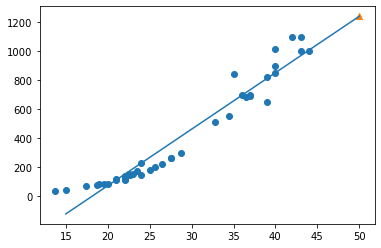

In [20]:
plt.scatter(train_input, train_target)

# 15~50
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.show()

In [21]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


## 다항회귀

In [22]:
# 2차 방정식 그래프를 그리기 위해 길이를 제곱한 항을 추가하는 작업을 진행해야 한다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [24]:
print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [25]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [27]:
lr.predict([[50**2, 50]])

array([1573.98423528])

In [28]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


- 무게 = 1.01 * 길이<sup>2</sup> + -21.55*길이 + 116.05

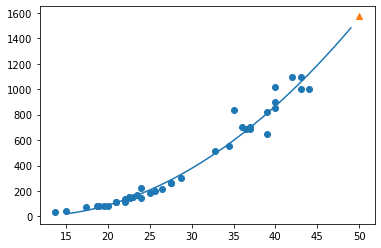

In [29]:
point = np.arange(15, 50)
plt.scatter(train_input, train_target)

# 15~50
plt.plot(point, 1.01*point**2-21.6*point+116.05)
plt.scatter(50, 1574, marker='^')
plt.show()

In [31]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


## 특성공학과 규제

### 다중회귀(Multiple Regression)
- 여러개의 특성을 사용한 선형 회귀 알고리즘
- 특성공학 : 기존의 특성을 사용해 새로운 특성을 뽑아내는 것을 말한다.

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv')

In [36]:
raw = df.to_numpy()

In [37]:
# 생선의 길이, 높이, 두께를 이용한 회귀분석
raw

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [38]:
# target data
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 훈련 세트와 테스트 세트로 분리

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
train_input, test_input, train_target, test_target = train_test_split(\
                                                                     raw, weight, random_state=42)

#### 사이킷런 변환기

In [42]:
# 다항식 변환기
from sklearn.preprocessing import PolynomialFeatures
# PolynomialFeatures : 현재 데이터를 다항식의 형태로 변환하는 역할을 수행

In [44]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

- 무게 = a*길이 + b*높이 + c*두께 + 1

In [46]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [47]:
# 컬럼명 추출
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [48]:
test_poly = poly.transform(test_input)

### 다중 회귀 모델

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)


0.9903183436982125

In [52]:
lr.score(train_poly, train_target)

0.9903183436982125

In [53]:
lr.score(test_poly, test_target)

0.9714559911594155

In [64]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 55)

In [56]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 55)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [58]:
lr.score(train_poly, train_target)

0.9999999999938143

In [59]:
lr.score(test_poly, test_target)

-144.40744532797535

- 과대 적합이 발생한다.
- 훈련 세트가 너무 많아진 경우

#### 규제 : 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것
- 모델이 훈련세트에 과대적합되지 않도록 만드는 것
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.

In [65]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#### 릿지회귀

In [66]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [67]:
ridge.score(test_scaled, test_target)

0.9790693977615386

- 릿지 회귀(Ridge Regression) 모델 : 계수를 제곱한 값을 기준으로 규제 적용
- 라쏘 회귀(Lasso Regression) 모델 : 계수의 절대값을 기준으로 규제 적용
- 두 알고리즘 모두 계수의 크기를 줄이지만 라소는 아예 0으로 만들 수도 있어서 일반적으로 릿지를 조금 더 선호한다.
- alpha : 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절하는 하이퍼파라미터
- alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성이 크다.
- 하이퍼파라미터(Hyperparameter) : 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터

In [68]:
# 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지모델
    ridge = Ridge(alpha=alpha)
    # 릿지모델 훈련
    ridge.fit(train_scaled, train_target)
    # 결정계수(R2 score)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

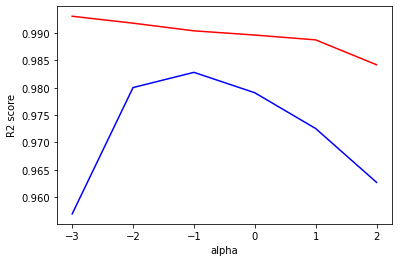

In [72]:
plt.plot(np.log10(alpha_list), train_score, c='r')
plt.plot(np.log10(alpha_list), test_score, c='b')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.show()

- 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트세트의 점수가 가장 높은 지점 -1, 10^-1 = 0.1

In [73]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


#### 라쏘 회귀

In [74]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [75]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 라쏘모델
    lasso = Lasso(alpha=alpha)
    # 릿지모델 훈련
    lasso.fit(train_scaled, train_target)
    # 결정계수(R2 score)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


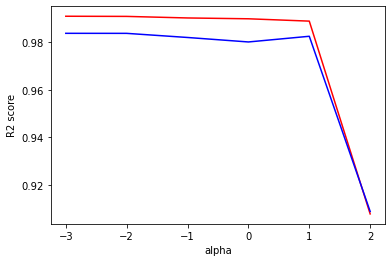

In [76]:
plt.plot(np.log10(alpha_list), train_score, c='r')
plt.plot(np.log10(alpha_list), test_score, c='b')
plt.xlabel('alpha')
plt.ylabel('R2 score')
plt.show()

In [77]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [78]:
np.sum(lasso.coef_==0)

40

In [79]:
np.sum(ridge.coef_==0)

0

## 실습문제 : 보스턴 집값 예측

In [80]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [81]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [82]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [83]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [87]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [99]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [92]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [102]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [101]:
df['price'] = pd.Series(boston['target'])

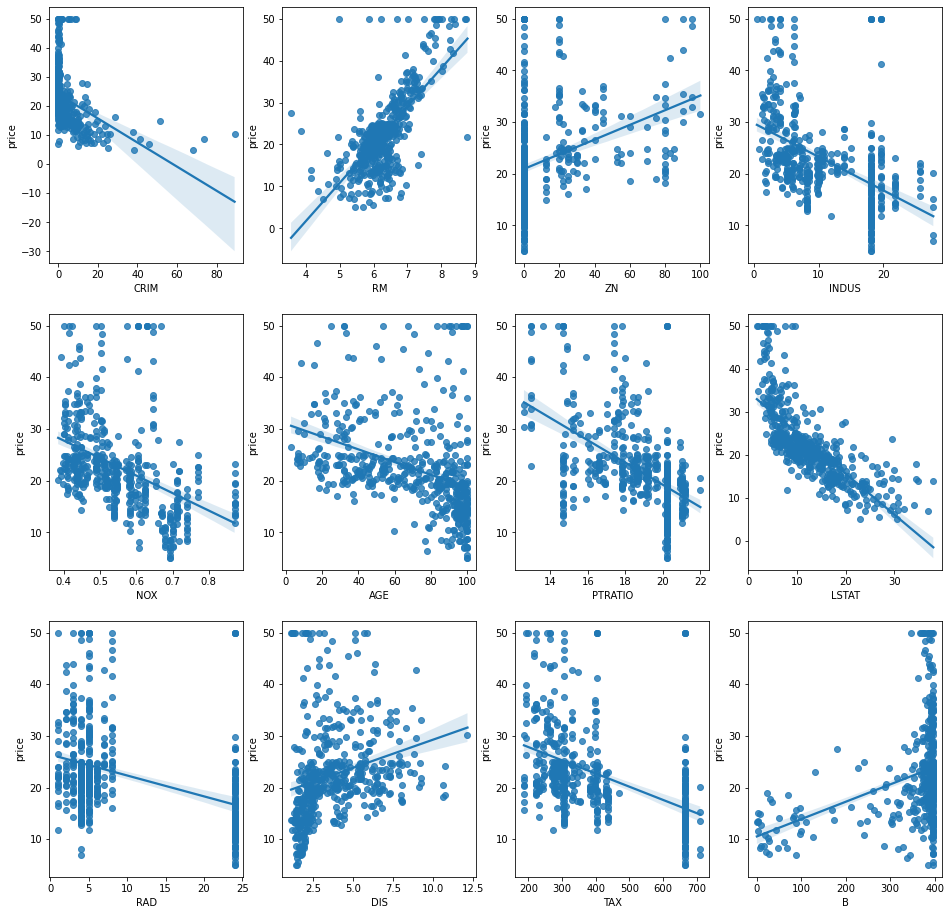

In [105]:
import seaborn as sns
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=3)

lm_features = ['CRIM','RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD', 'DIS', 'TAX', 'B']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='price', data=df, ax=axs[row][col])

In [109]:
for i, feature in enumerate(lm_features):
    np.corrcoef(df['feature'], df.price)

KeyError: 'feature'

In [132]:
print('CRIM : ', np.corrcoef(df.CRIM, df.price)[0, 1])
print('ZN : ', np.corrcoef(df.ZN, df.price)[0, 1])
print('INDUS : ', np.corrcoef(df.INDUS, df.price)[0, 1])
print('CHAS : ', np.corrcoef(df.CHAS, df.price)[0, 1])
print('NOX : ', np.corrcoef(df.NOX, df.price)[0, 1])
print('RM : ', np.corrcoef(df.RM, df.price)[0, 1])
print('AGE : ', np.corrcoef(df.AGE, df.price)[0, 1])
print('DIS : ', np.corrcoef(df.DIS, df.price)[0, 1])
print('RAD : ', np.corrcoef(df.RAD, df.price)[0, 1])
print('TAX : ', np.corrcoef(df.TAX, df.price)[0, 1])
print('PTRATIO : ', np.corrcoef(df.PTRATIO, df.price)[0, 1])
print('B : ', np.corrcoef(df.B, df.price)[0, 1])
print('LSTAT : ', np.corrcoef(df.LSTAT, df.price)[0, 1])

CRIM :  -0.3883046085868114
ZN :  0.3604453424505433
INDUS :  -0.4837251600283728
CHAS :  0.17526017719029818
NOX :  -0.4273207723732824
RM :  0.695359947071539
AGE :  -0.37695456500459606
DIS :  0.24992873408590388
RAD :  -0.38162623063977746
TAX :  -0.46853593356776696
PTRATIO :  -0.5077866855375615
B :  0.33346081965706637
LSTAT :  -0.7376627261740148


CRIM: 지역별 범죄 발생률
ZN: 25,000평방피트를 초과하는 거주 지역의 비율
INDUS: 비상업 지역 넓이 비율
CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
NOX: 일산화질소 농도
RM: 거주할 수 있는 방 개수
AGE: 1940년 이전에 건축된 소유 주택의 비율
DIS: 5개 주요 고용센터까지의 가중 거리
RAD: 고속도로 접근 용이도
TAX: 10,000달러당 재산세율
PTRATIO: 지역의 교사와 학생 수 비율
B: 지역의 흑인 거주 비율
LSTAT: 하위 계층의 비율
PRICE: 본인 소유의 주택 가격(중앙값) - 종속변수 (위의 건 독립변수)

### 훈련셋과 테스트셋 분리

In [94]:
train_input, test_input, train_target, test_target = train_test_split(boston['data'], boston['target'],
                                                                      random_state=0)

#### 1차 회귀

In [97]:
lr.fit(train_input, train_target)

LinearRegression()

In [98]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7697699488741149
0.6354638433202129


### 사이킷런

In [96]:
poly = PolynomialFeatures()
train_poly = poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.fit(test_input)
test_poly = poly.transform(test_input)